In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [64]:
label = {
     0 : 'Airplanes' ,
     1 : 'Cars ' ,
     2 : 'Birds' ,
     3 : 'Cats' ,
     4 : 'Deer' ,
     5 : 'Dogs' ,
     6 : 'Frogs' ,
     7 : 'Horses' ,
     8 : 'Ships' ,
     9 : 'Trucks' 
}


In [65]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [66]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


Horses


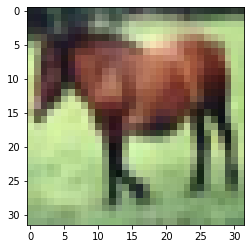

In [67]:
idx = 7
plt.imshow(X_train[idx])
print(label[y_train[idx][0]])

In [68]:
index = np.random.randint(0, len(X_train))
index

47130

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


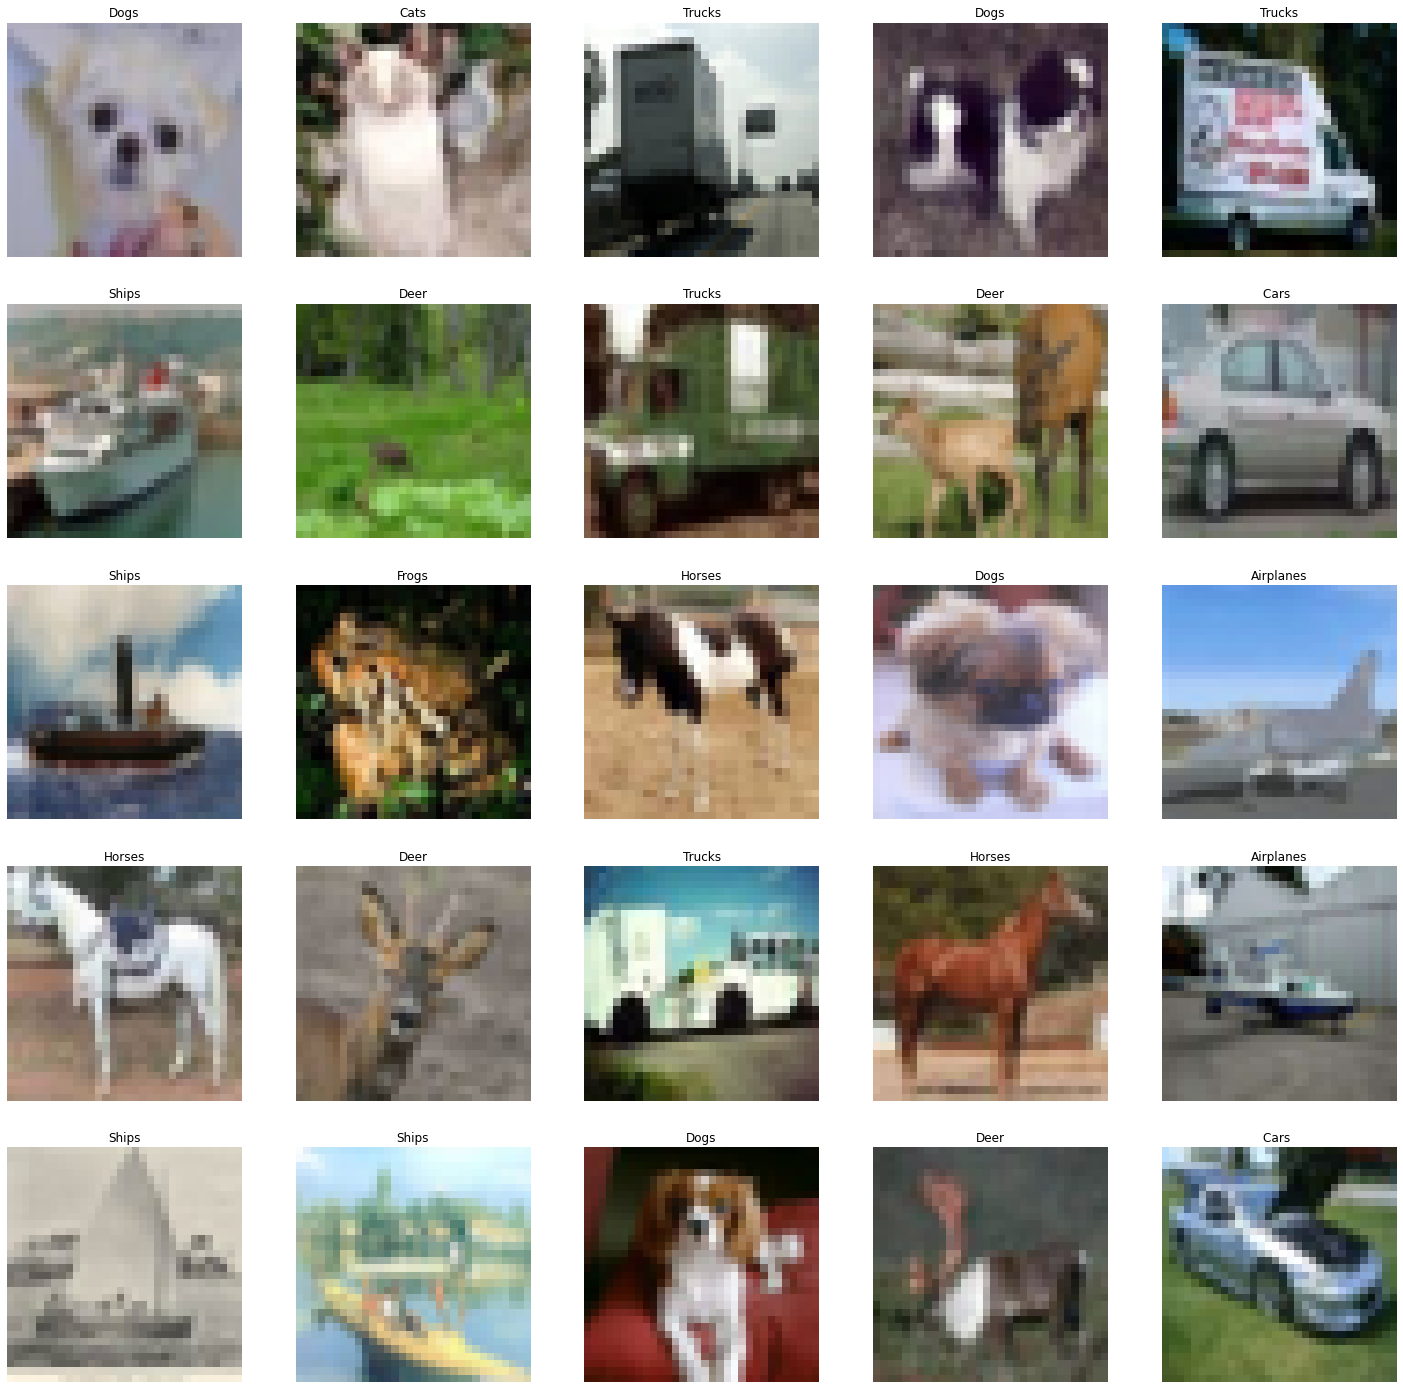

In [69]:
X_size = 5
Y_size = 5

fig, axes = plt.subplots(X_size, Y_size, figsize = (25, 25))
axes = axes.ravel()  # ravel : 25 ,1 로 바뀌었다.

for i in range(len(axes)):
  index = np.random.randint(0, len(X_train))
  axes[i].imshow(X_train[index])
  axes[i].set_title(label[y_train[index][0]])
  axes[i].axis('off')
  print(i)
  


In [70]:
# 0 과 1사이로 바꿔준다.
X_train = X_train / 255
X_test = X_test / 255


In [71]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [72]:
y_train.shape

(50000, 10)

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(64, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))  # 3 틀렸다. (색깔이니깐)
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(1024, activation = 'relu'))   ## Dense 는 뭐지? 등등 해석
model.add(Dense(10, activation = 'softmax'))  ## 잘모르겠음./ 10 ....틀림. (클래스가 10개니까 10로 나오게 해야되겠구나)
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 conv2d_23 (Conv2D)          (None, 10, 10, 128)       147584    
                                                      

In [74]:
model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.experimental.RMSprop(learning_rate=0.001),
              metrics = ['accuracy'] )

In [75]:
history = model.fit(X_train, y_train, batch_size = 32, epochs = 30, shuffle = True)

Epoch 1/30
1563/1563 [==============================] - 14s 8ms/step - loss: 1.6071 - accuracy: 0.4213
Epoch 2/30
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1185 - accuracy: 0.6115
Epoch 3/30
1563/1563 [==============================] - 13s 9ms/step - loss: 0.9356 - accuracy: 0.6808
Epoch 4/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8588 - accuracy: 0.7114
Epoch 5/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8036 - accuracy: 0.7324
Epoch 6/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7739 - accuracy: 0.7454
Epoch 7/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7400 - accuracy: 0.7589
Epoch 8/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7326 - accuracy: 0.7636
Epoch 9/30
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7104 - accuracy: 0.7735
Epoch 10/30
1563/1563 [==============================] - 12s 8ms/step - l

In [76]:
model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.experimental.RMSprop(learning_rate=0.001),
              metrics = ['accuracy'] )

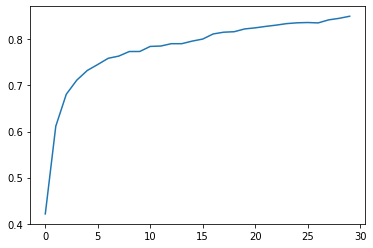

In [77]:
plt.plot(range(len(history.history['accuracy'])), history.history['accuracy'])

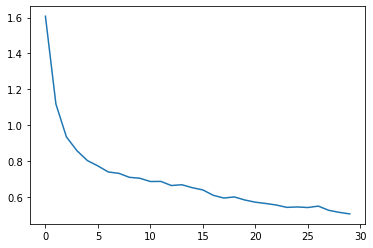

In [78]:
plt.plot(range(len(history.history['loss'])), history.history['loss'])

In [79]:
y_test = tf.keras.utils.to_categorical(y_test, 10)
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.8642 - accuracy: 0.7328


[0.86419278383255, 0.7328000068664551]

In [80]:
# predict
prediction = model.predict(X_test)
prediction.shape  # (10000, 10)

313/313 [==============================] - 1s 2ms/step


array([[6.49648486e-03, 7.21326545e-02, 8.33494030e-03, ...,
        5.63793862e-03, 6.68667033e-02, 4.08964992e-01],
       [6.63031824e-03, 7.33129382e-01, 3.26608191e-04, ...,
        2.00640989e-05, 1.21925153e-01, 1.37711525e-01],
       [9.20008346e-02, 9.66957882e-02, 3.35774086e-02, ...,
        1.12102283e-02, 2.65296787e-01, 3.65714848e-01],
       ...,
       [9.22351755e-05, 3.24275279e-05, 2.57038348e-03, ...,
        5.53350411e-02, 7.06180390e-06, 3.05468602e-05],
       [2.52812505e-01, 6.18932188e-01, 1.54842576e-03, ...,
        7.99018308e-05, 5.67318536e-02, 6.51466846e-02],
       [1.08946685e-17, 7.35044868e-17, 7.51664725e-23, ...,
        1.00000000e+00, 4.05085339e-19, 1.13715918e-21]], dtype=float32)

In [84]:
test_label = y_test.argmax(axis = 1)   # 실제제

In [85]:
prediction_argmax = prediction.argmax(axis = 1)  # 예측

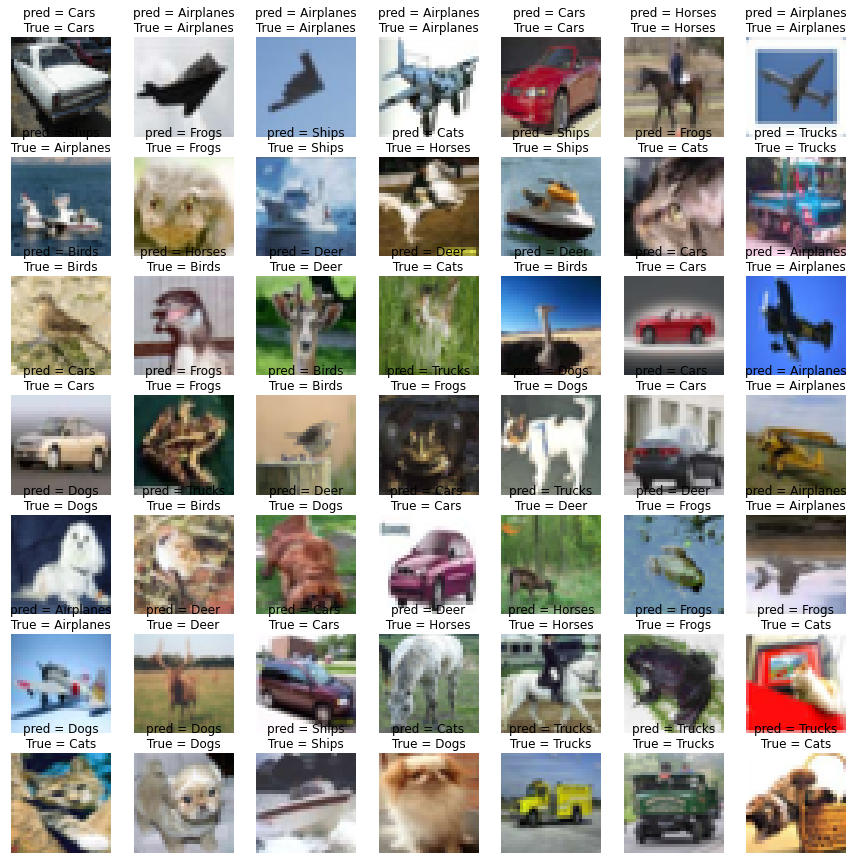

In [91]:
X_size = 7
Y_size = 7

fig, axes = plt.subplots(X_size, Y_size, figsize = (15, 15))
axes = axes.ravel()  # ravel : 15 ,1 로 바뀌었다.

for i in range(len(axes)):
  index = np.random.randint(0, len(test_label))
  axes[i].imshow(X_test[index])
  prediction_result = label[prediction_argmax[index]]
  real = label[test_label[index]]
  axes[i].set_title(f'pred = {prediction_result}\n True = {real} ')
  axes[i].axis('off')




In [80]:
사슴과 개, 고양이와 개, 차와 개, 고양이와 새, 새와 비행기, 고양이와 개사슴, 고양이들....

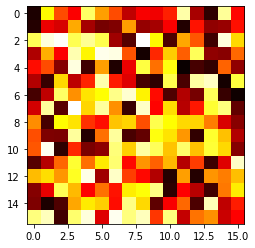

In [94]:
import matplotlib.pyplot as plt
import numpy as np

a = np.random.random((16, 16))
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()

In [ ]:
a = np.random.random((16, 16))
plt.imshow(a, camp = , interpolation = 'near',
           )

In [ ]:
test_label
prediction_argmax

In [97]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_label, prediction_argmax)

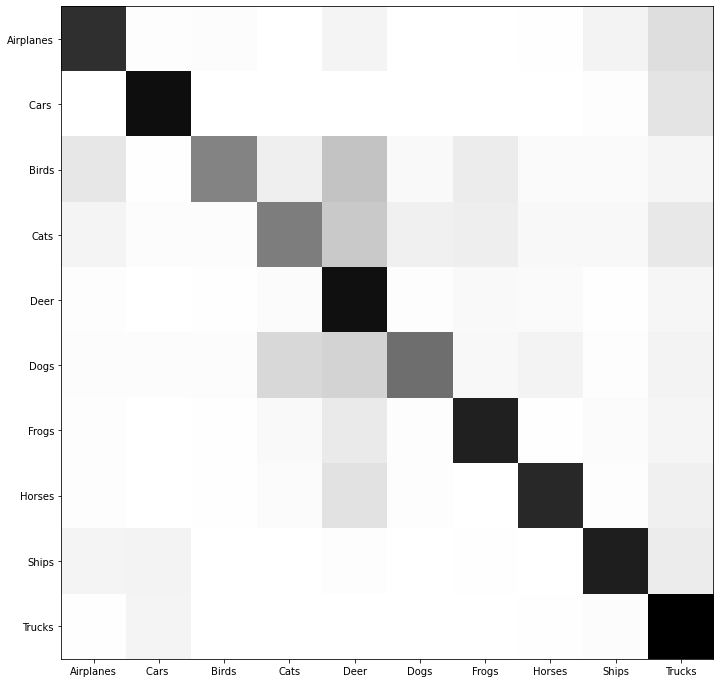

In [116]:
import matplotlib.pyplot as plt
import numpy as np
x_ticks = label.values()

fig, axes = plt.subplots(1, 1, figsize = (12, 12))
plt.imshow(cm, cmap='binary', interpolation='nearest')
plt.xticks(np.arange(0, len(label.values())))
plt.yticks(np.arange(0, len(label.values())))
axes.set_xticklabels(label.values(), fontsize = 10)
axes.set_yticklabels(label.values(), fontsize = 10)

plt.show()

In [118]:
model.save('./models')  # 모델을 저장

# Data Argumentation

In [122]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [123]:
X_train = X_train / 255
X_test = X_test / 255


0
1
2
3
4
5
6
7


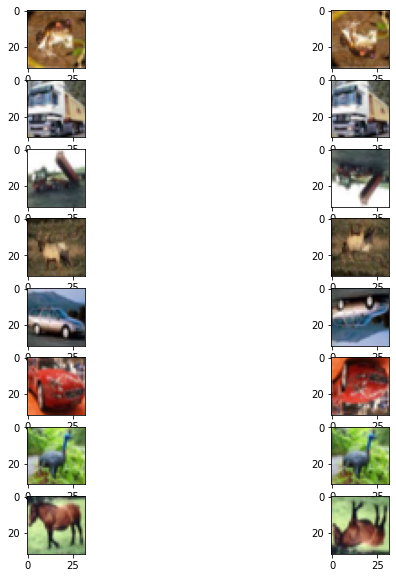

In [146]:
# data generator 라는 객체
# sample
sample_data = X_train[:8]
datagen = tf.keras.preprocessing.image.ImageDataGenerator(vertical_flip = True)
# datagen = tf.keras.preprocessing.image.ImageDataGenerator(brightness_range = (0.3, 0.8))
# datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range = 90)
datagen.fit(sample_data)

fig, axes = plt.subplots(8, 2, figsize = (10, 10))
datagen_img = datagen.flow(sample_data, batch_size = 1, shuffle = False)

for i in range(len(sample_data)):
  batch = datagen_img.next()[0]
  axes[i][0].imshow(sample_data[i])
  axes[i][1].imshow(batch)
  print(i)
                           

In [148]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(vertical_flip = True)
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range = 90,
                                                          vertical_flip = True,
                                                          height_shift_range = 0.5)
datagen.fit(X_train)


In [149]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(64, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))  # 3 틀렸다. (색깔이니깐)
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(1024, activation = 'relu'))   ## Dense 는 뭐지? 등등 해석
model.add(Dense(10, activation = 'softmax'))  ## 잘모르겠음./ 10 ....틀림. (클래스가 10개니까 10로 나오게 해야되겠구나)
model.summary()

In [158]:
model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.experimental.RMSprop(learning_rate=0.001),
              metrics = ['accuracy'] )

In [155]:
history = model.fit(datagen.flow(X_train, y_train, batch_size = 32), epochs = 30)

Epoch 1/30
1563/1563 [==============================] - 36s 22ms/step - loss: 2.0552 - accuracy: 0.2304
Epoch 2/30
1563/1563 [==============================] - 35s 22ms/step - loss: 1.8795 - accuracy: 0.3073
Epoch 3/30
1563/1563 [==============================] - 36s 23ms/step - loss: 1.7812 - accuracy: 0.3522
Epoch 4/30
1563/1563 [==============================] - 36s 23ms/step - loss: 1.7287 - accuracy: 0.3774
Epoch 5/30
1563/1563 [==============================] - 35s 22ms/step - loss: 1.6863 - accuracy: 0.3965
Epoch 6/30
1563/1563 [==============================] - 43s 28ms/step - loss: 1.6585 - accuracy: 0.4049
Epoch 7/30
1563/1563 [==============================] - 34s 22ms/step - loss: 1.6402 - accuracy: 0.4128
Epoch 8/30
1563/1563 [==============================] - 33s 21ms/step - loss: 1.6246 - accuracy: 0.4222
Epoch 9/30
1563/1563 [==============================] - 34s 22ms/step - loss: 1.6104 - accuracy: 0.4308
Epoch 10/30
1563/1563 [==============================] - 45s 29m

In [156]:
# 다음시간에는 epoch를 조금돌린다음에 완성된모델을 바탕으로 실제 이미지를 받아서 그걸모델활용해서 예측하는 것을 활용.
# Transper learning 이 중요 (남들이 잘해놓은거 가져오기)

NameError: ignored